Trendline: y = 0.02x + 3270.96
P-value for slope coefficient: 0.006383526184666931
y=0.02x+3270.96
Trendline: y = 0.01x + 2980.79
P-value for slope coefficient: 0.1173035367487136
y=0.01x+2980.79
Trendline: y = 0.00x + 2693.37
P-value for slope coefficient: 0.2766078998140219
y=0.00x+2693.37
Trendline: y = 0.03x + 2356.06
P-value for slope coefficient: 0.07669013160322569
y=0.03x+2356.06
Trendline: y = 0.04x + 2033.14
P-value for slope coefficient: 0.00039335854140193095
y=0.04x+2033.14
Trendline: y = 0.03x + 1753.62
P-value for slope coefficient: 0.032430841270129074
y=0.03x+1753.62
Trendline: y = 0.03x + 1450.61
P-value for slope coefficient: 0.034678281863327415
y=0.03x+1450.61
Trendline: y = 0.08x + 1051.27
P-value for slope coefficient: 0.0006586405653941565
y=0.08x+1051.27
Trendline: y = 0.07x + 763.81
P-value for slope coefficient: 0.06310866625916282
y=0.07x+763.81
Trendline: y = 0.02x + 557.18
P-value for slope coefficient: 3.7896299728900597e-06
y=0.02x+557.18
Trendline: y = 

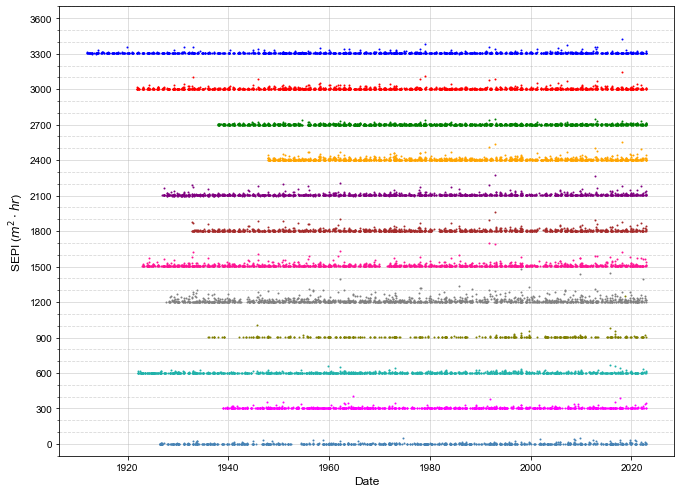

<function matplotlib.pyplot.clf()>

In [5]:
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from dateutil import parser
import numpy as np
from scipy.stats import linregress


plt.rcParams["font.family"] = "Arial"

# Convert millimeters to inches
mm_to_inch = 0.0393701
fig_width_mm = 280
fig_height_mm = 210

fig_width_inch = fig_width_mm * mm_to_inch
fig_height_inch = fig_height_mm * mm_to_inch
plt.figure(figsize=(fig_width_inch, fig_height_inch))

# Set the path to the directory containing the CSV files
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
folder_path = os.path.join(parent_dir, "Final_Storm_Results")

# Create the path to the folder within the current directory
filenames = os.listdir(folder_path)
file_paths = [os.path.join(folder_path, f) for f in filenames]

# Get a list of all CSV files in the directory
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
file_names = sorted(file_names)

now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
output_path = "SEPI_vs_Time_wide.jpeg"

# Set the vertical offset
vertical_offset = 3300.0 

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'deeppink', 'gray', 'olive', 'lightseagreen', 'magenta', 'steelblue']

label_list = ["Portland", "Boston", "Newport", "Montauk", "The Battery", "Sandy H.", "Atlantic C.", "Sewell's P.", "Willmington", "Charleston", "Fernand. B.", "Key West"]

# Create a list to store the dataframes
dfs = []
i = 0
for i, file_name in enumerate(file_names):
    #print(file_name)
    #print("Color = ", colors[i % len(colors)])
    #print(label_list[i % len(label_list)])

    if file_name.endswith(".csv"):
        filepath = os.path.join(folder_path, file_name)
        with open(filepath) as f:
            reader = csv.reader(f)
            next(reader)  # skip the header row
            dates = []
            values1 = []
            values2 = []
            for row in reader:
                date = parser.parse(row[0]).date()
                # date = datetime.strptime(row[0], '%Y-%m-%d %H:%M')
                value1 = float(row[1])
                value2 = float(row[2])
                dates.append(date)
                values1.append(value1)
                values2.append(value2)
        
        result = []
        decimal_dates = []
        for num in values1:
            result.append(num + vertical_offset)
            
        for val in dates:
            decimal_year = val.year + (val.timetuple().tm_yday - 1) / 365.25
            decimal_dates.append(decimal_year)
        plt.plot(dates, result, marker='o', markersize = 1.0, color=colors[i % len(colors)], linewidth = .5, label=label_list[i], linestyle = "None")
        #vertical_offset -= 200.0    #goes with a initial veritcal offset (above) of 2200.0)

        
        # Add linear trendline and equation
        x = decimal_dates
        y = result
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
    
        
        # Calculate linear regression and p-value using scipy.stats.linregress
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        r2_value = r_value * r_value

        # Print equation and p-value
        print("Trendline: y = {:.2f}x + {:.2f}".format(slope, intercept))
        print("P-value for slope coefficient:", p_value)

        # Uncomment to plot trendlines

        label_text = "m = {:.4f}, p = {:.4f}, $R^2$ = {:.4f}, st err = {:.4f}".format(slope, p_value, r2_value, std_err)
        print("y={:.2f}x+{:.2f}".format(z[0], z[1]))
        #plt.plot(x, p(x)+ vertical_offset, "k--", linewidth=2)
        # Print labels next to the data points
        x_label = 4070
        y_label = vertical_offset + 80
        #plt.text(x_label, y_label, label_text, color=colors[i % len(colors)], fontsize=8)
        
        
        vertical_offset -= 300.0
        i += 1


plt.grid(True, which='major', axis='x', alpha=0.5, linestyle='-')
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(200))

# Set the major grid lines for y ax
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(300))

# Set the minor grid lines for the y-axis
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(100))

plt.ylim(-100, 3700)
#plt.xlim(1910,2055)

#xticks = [1920, 1940, 1960, 1980, 2000, 2020]
#plt.xticks(xticks)

plt.xlabel("Date", fontsize=12)
plt.ylabel("SEPI ($m^2 \cdot hr$)", fontsize=12)
#plt.legend(fontsize=8, frameon=True, shadow=False, title='Tidal Stations', framealpha=1.0)

#plt.tick_params(axis='both', labelsize=10)
        
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
plt.clf